<div style="margin-left:3vw;text-align:center" > <img src="https://raw.githubusercontent.com/sagemath/artwork/dc51186a48f46ac9ff29e453491b8daf4c52ca15/sagemath/stickermule/sage-squared.svg" alt="SageMath Logo" style="width:100px;float:right"/> 

[SageMath](https://sagemath.org/)

    
[SageMath Browser](https://sagecell.sagemath.org/?z=eJy9Vt1u2zYUvi_Qd-C0i5IuXchudhEDGtAA2zAMKIpk6I2mCox0FBOTRI2kmrhBXqa7GPocfrEdSrIsKU7jBsN8QUvUOd_5-J0fSRaV0pZoeP7s-bMUMhKba2mTNbVwY1fGat7ex5nSgbfw2PxHgrsrZ07w164abK1LcnFONbwy9SX1wjgKf4tCf356ehp53PnQPRJrN1wMxtgkdCzLFG72BJrblSztlMrqgeDZLvpt43p3bPwUjMo_QkVTWF2c8xQqQP_Sxh-FluIyhxVeHNDjFy2qtUxMz8fUuY0LsGuVkmAHi6gHILlZq-vONvhd18ATVVotL2OVQrPBWlSZjYHDRUSCgHgNkJWqVFkltMCHoI3XUblHp_Ei3nvntP1n-7ciqTLkndDbz2iglfFaR8cKdXxDkHrdGl6BFjm5vX-EO5IKAn_VHeD2y4p4bAAzJuBHbBTiHeSKFNsvVqVIBsjtlO_dDszqzeBYLnd4FJfGbxOY7SnATQKVJW-V_bWocijQD9KftFb6vwr0UDYrRAyrXFk67DcuZ0ufcTo_mVWSu4UhQI6VpoUsL1GvH1goI74pZBnMXzujTSFuAnfFCFYkkUSWRIvyCqjPT1h0oEkb3U1d0IrxTF4Z-QkCesK4MBUkNtaumIIXoraqwMvkRd8e11qV5k-6Wbjm2Czd6vproINrV0awIy7OOwFxE3N8i399GkdkUrA0DDcLxIt4mMosQ3yOrezkRi_sTt7uLse7UdTzwrJHnnUudPyV9LBRdz7alg_kzVyLqgLX1bu8OUotJuM-m06kzr7nulaFuoISVG2OITsw_3bGZH6sNCPWg5g71m4IuBGDnDFfj8jbFhna9aU9nuvHSsAXqCfjO5mfBLF0EIMXDGpkrCitoZPK5ZXKZeDjn8VV6CTwdyfqfVzLjhqqaThHaN90Dublgg3GR-_-ylVCmVKsisyL33TvJo-xvS3OeAxNvguIP0D4CsrZFKWT39Y4zmjv1AuAosUFFkh-xPl54x78LHLTZ_eoE7c9PzjhvUdnk0fDFfE2pSqkyGNXvQun-k6yBD1mE-YfkoZVco9RdBBvucc7exJePz-aETohy8iMwAfctlNYNkuUoSjszLIuz0HgE0BxyR_dbHk64MtDzkv2sK-RZefbf1006R6ksdL4yUUfaRlXMK5cJvXXiuSq7vv_5_cvSrF21w==&lang=sage&interacts=eJyLjgUAARUAuQ==)

    
[Link do Arquivo no GitHub](https://github.com/Gabriel5Romao/coisas_matematicas/blob/main/equacoes_diferenciais_sage.ipynb)
    
</div>

## Resolução de Equações Diferenciais Utilizando SageMath

Seja $y$ uma função de $t$, e uma equação diferencial (1) definida na seguinte forma:

$$\begin{equation}
y''(t) + p(t)y' + q(t)y = g(t)
\end{equation}$$

Para que o sage reconheça uma derivada, uma função e igualdade, devemos utilizar de funções já embutidas. Segue a instrução para resolução de uma E.D.O.

1. Defina as variáveis utilizando `var("x1,x2,x3,...")` onde `x1,x2,x3,...` é cada uma das variáveis que você irá utilizar. Defina também as variáveis independentes.
2. Se y é função de t, então escreva `y = function('y')(t)`
3. Para derivar, usamos a função do Sage, `diff(função,variável,opcional:ordem_da_derivada)`
4. Uma boa prática é guardar a equação diferencial em uma variável.
5. Para resolver a equação diferencial utilize a função `desolve(equação_diferencial,variável_dependente,opcional:show_method=True)`

## Observações adicionais

Com o objetivo de fazer também o gráfico. Foi criada função `desolvep` que é utilizada da mesma maneira que a função `desolve`. Nela tem um código RegEx, que faz a substituição das constantes por 1, para fazer a plotagem.

Para auxiliar com a aplicação e estudo do método de variação dos parâmetros e coeficientes a se determinar, foram introduzidas as funções `wronsk`,`particular_solve`, `homogeneous_solve`, `solutions_set`, `gen_model`.

In [1]:
import re

def _switch(text:str,switch_for:str="1")-> str:
    """
    Function to switch the constants in a result by a given number.
    Parameters:
        text: str of the discussion.
        switch_for: the given number of type str.
    Output:
        String which the constants is equal the given number.
    """
    
    return SR(re.sub("[_][K][0-999]", str(switch_for), str(text)))

def _switch_index(text:str,index:int,switch_for:float="1") -> SR:
    """
    Function to switch one of the constants in a result by a given number.
    Parameters:
        text: str of the discussion.
        switch_for: the given number of type str.
    Output:
         Symbolic Ring which the constants is equal the given number.
    """
    return SR(re.sub(f"[_][K][{index}]", str(switch_for), str(text)))

In [2]:
def desolvep(de:SR,dependent_variable:var,switch_for:str="1")-> Graphics:
    """
    Function which uses the built-in desolve sage function. Added the show method to print the result of desolve and
    a simple plot to visualize the result.
    Parameters:
        de: A Symbolyc Ring which represents the differential equation.
        dependent_variable: result in function fo the variable dependent_variable.
        switch_for: the given number of type str.
    Output:
        A graphics 2d object
    """
    
    result_method = desolve(de,dependent_variable,show_method=True,contrib_ode=True) 
    if result_method[1] == "variationofparameters":
        result_method[1] = "Variação dos Parâmetros"
    show(f"A solução geral {dependent_variable} da equação é: ")
    show(result_method[0])
    show(f"Pelo método de {result_method[1]}")
    try:
        text = str(desolve(de,dependent_variable,show_method=True)[0])
    except NotImplementedError:
        text = str(desolve(de,dependent_variable,show_method=True)[0],contrib_ode=True)
    p = [plot(_switch(text,i*20),(-10*pi,10*pi),color=rainbow(5)[i],ymin=-7*pi,ymax=7*pi) for i in range(0,4)]
    
    return show(sum(p),figsize=(4),aspect_ratio='automatic')

In [3]:
def wronsk(y1:SR,y2:SR,independent_var:str) -> SR:
    """
    Return the Wronsk's Determinant of the solutions y1 and y2 of a ODE.
    Parameters:
        y1: A SR, which is one of the solutions da ODE.
        y2: A SR, which is one of the solutions da ODE.
        independent_var: A str which is the variable of the solutions or the problem
    Output:
        A SR which represents the Wronsk's determinant
    """
    
    var(f"{var}")
    
    return det([[y1,y2],[diff(y1,SR(str(var))),diff(y2,SR(str(var)))]])

In [4]:
def particular_solve(de:SR,dependent_variable:var) -> SR:
    """
    
    """
    result = desolve(de,dependent_variable,contrib_ode=True)
    swapped = SR(_switch(str(result),0))
    
    return swapped

In [5]:
def homogeneous_solve(de:SR,dependent_variable:var) -> SR:
    """
    
    """
    
    return desolve(de,dependent_variable,contrib_ode=True) - particular_solve(de,dependent_variable)

In [6]:
def solutions_set(de:SR,dependent_variable:var) -> SR:
    """
    
    """
    
    
    return set((_switch(_switch_index(homogeneous_solve(de,dependent_variable),1,0)),switch(switch_index(homogeneous_solve(de,dependent_variable),2,0))))

In [7]:
def _constants(independent_var:var,poli:float=0,pot:float=0,arc:float=0) -> tuple:
    
    """
    
    """
    
    constants = []
    for index in range(poli+1):
        constants.append(SR(f"_A{index}"))
        if arc != 0:
            constants.append(SR(f"_B{index}"))
            
    return tuple(constants)

In [8]:
def gen_model(independent_var:var,poli:float=0,pot:float=0,arc:float=0,const:bool=False):
    """
    
    """
    
    for index in range(poli+1):
        var(f"_A{index}")
        var(f"_B{index}")
    
    polynomial_part1 = [SR(f"_A{c}")*independent_var^c for c in range(poli+1)]
    polynomial_part2 = [SR(f"_B{c}")*independent_var^c for c in range(poli+1)]
    result = sum(polynomial_part1) * e^(pot*independent_var)*cos(arc*t) if arc==0 else \
    sum(polynomial_part1) * e^(pot*independent_var)*cos(arc*t) + sum(polynomial_part2)* e^(pot*independent_var)*sin(arc*t)
    if const:
        print(_constants(independent_var,poli,pot,arc))
        
    return result

**EX:** Encontre a solução geral da equação $y'' + y' = 2 +t^2$

In [9]:
var("y,t") # Declaração de Variáveis. t é suficiente.
y = function('y')(t)  # Reconheça y como função de t
d1 = diff(y,t)  # Derivada de y com relação a t
d2 = diff(d1,t)  # Derivada de y com relação a t de ordem 2


In [10]:
de = d2 + d1 == 2 + t^2  # Armazenando a E.D.O. em uma variável
desolve(de,y)  # Resolve a E.D.O.

1/3*t^3 - t^2 + _K2*e^(-t) + _K1 + 4*t - 4

'A solução geral y(t) da equação é: '

1/3*t^3 - t^2 + _K2*e^(-t) + _K1 + 4*t - 4

'Pelo método de Variação dos Parâmetros'

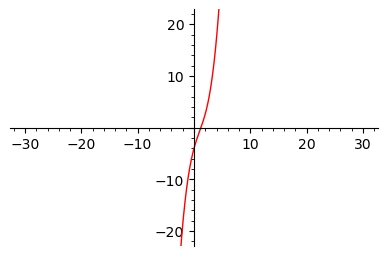

In [11]:
desolvep(de,y)  # Função customizada que resolve a E.D.O.

Para se trabalhar com o método de coeficientes a se determinar, precisamos sempre conhecer um modelo. A função `gen_solve` informando a variável independente, o grau do polinômio (`poli`), o expoente (`pot`) e o arco (`arc`), gera um modelo para você trabalhar esse método.

É possível tomar o modelo e usar as funções de derivada no sage para calcular derivada do modelo.

In [12]:
gen_model(t,poli=2)  # Gerando o modelo para 2 + t^2

_A2*t^2 + _A1*t + _A0

In [13]:
model = gen_model(t,poli=2)  # Guardando o modelo em uma variável
d1model = diff(model,t)  # Derivada do modelo
d2model = diff(model,t,2)  # Derivada segunda do modelo

# Exibindo na tela os modelos
print(model)
print(d1model)
print(d2model)

_A2*t^2 + _A1*t + _A0
2*_A2*t + _A1
2*_A2


**EX:** Resolva $y'' + 2y' + y = (2+t)e^{-t}$

'A solução geral y(t) da equação é: '

1/6*(t^3 + 6*t^2)*e^(-t) + (_K2*t + _K1)*e^(-t)

'Pelo método de Variação dos Parâmetros'

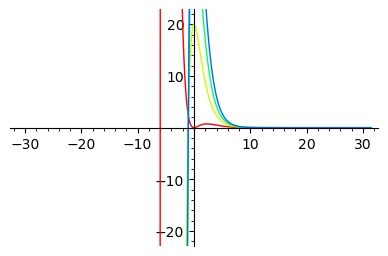

In [14]:
de = d2 + 2*d1 + y == (2+t)*e^(-t)
desolvep(de,y)

In [15]:
# Gerando o modelo

**EX:** Resolva $y'' +2y'+2y = e^t cos(t)$

'A solução geral y(t) da equação é: '

(_K2*cos(t) + _K1*sin(t))*e^(-t) + 1/8*cos(t)*e^t + 1/8*e^t*sin(t)

'Pelo método de Variação dos Parâmetros'

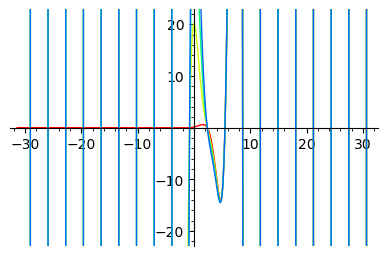

In [16]:
desolvep(d2+2*d1+2*y==e^(t)*cos(t),y,10000)

In [17]:
# Gerando o modelo